In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import data and correct columns headers

In [2]:
sepsisRelated = pd.read_excel("sepsis_related_500_demo.xlsx")
deadAlive = pd.read_excel("outcomes_500_demo.xlsx", names = ["h_num_hash","APACHEII_result", "ICULOS", "ICUMortality"])
ABGLabsHourly = pd.read_excel("ABG_Labs_hourly_20000_demo.xlsx", skiprows=[0,1,2], names=["h_num_hash","Hourly_Counter",
"PaO2-1","PaO2-2","BEvt-1","BEvt-2","PotassiumABG-1","PotassiumABG-2","PH-1","PH-2","IonCalciumABG-1","IonCalciumABG-2",
"LactateABG-1","LactateABG-2","GlucoseABG-1","GlucoseABG-2","Na-ABG-1","Na-ABG-2","Chloride-ABG-1","Chloride-ABG-2",
"PaCO2-1","PaCO2-2"])
respHourly = pd.read_excel("resp_hourly_20000_demo.xlsx", skiprows=[0,1,2], names=["h_num_hash","Hourly_Counter","FiO2","PEEP"])
vitalHourly = pd.read_excel("vital_hourly_20000_demo.xlsx", skiprows=[0,1,2], names=["h_num_hash","length of stay (hours)",
"Hourly_Counter","ArtBPS","TEMP","HR","ArtBPD","ArtBPM","UR_h"])

drop unnecessary columns and rows in each table

In [3]:
respHourly.dropna(inplace=True, axis=0)

In [4]:
ABGLabsHourly.drop(['BEvt-1','BEvt-2','PotassiumABG-1','PotassiumABG-2','PH-1','PH-2','IonCalciumABG-1','IonCalciumABG-2',
'GlucoseABG-1','GlucoseABG-2','Na-ABG-1','Na-ABG-2','Chloride-ABG-1','Chloride-ABG-2','PaCO2-1','PaCO2-2'], axis=1, inplace=True)

In [5]:
ABGLabsHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h_num_hash      19996 non-null  object 
 1   Hourly_Counter  19996 non-null  int64  
 2   PaO2-1          18379 non-null  float64
 3   PaO2-2          927 non-null    float64
 4   LactateABG-1    18271 non-null  float64
 5   LactateABG-2    980 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 937.4+ KB


In [6]:
vitalHourly.drop(['ArtBPS','TEMP','HR','ArtBPD','UR_h'],axis=1,inplace=True)

In [7]:
vitalHourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   h_num_hash              19996 non-null  object 
 1   length of stay (hours)  19996 non-null  float64
 2   Hourly_Counter          19996 non-null  int64  
 3   ArtBPM                  13820 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 625.0+ KB


In [8]:
deadAlive.drop(["APACHEII_result", "ICULOS"],axis=1,inplace=True)

In [9]:
deadAlive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   h_num_hash    498 non-null    object
 1   ICUMortality  498 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


merge tables

In [10]:
merged_df = pd.merge(respHourly, sepsisRelated, on=['h_num_hash'], how='inner', indicator=True)
merged_df.reset_index(drop=True)
merged_df.info()
merged_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2231
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   h_num_hash      2232 non-null   object  
 1   Hourly_Counter  2232 non-null   int64   
 2   FiO2            2232 non-null   float64 
 3   PEEP            2232 non-null   float64 
 4   ProblemText     2232 non-null   object  
 5   ProblemGroup    2232 non-null   int64   
 6   _merge          2232 non-null   category
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 124.3+ KB


,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge
0,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1,both
1,00ED7319-79A7-4E56-A921-25474DC11058,1,75.0,8.0,Septic shock,1,both
2,00ED7319-79A7-4E56-A921-25474DC11058,2,70.0,8.0,Septic shock,1,both
3,00ED7319-79A7-4E56-A921-25474DC11058,3,50.0,8.0,Septic shock,1,both
4,00ED7319-79A7-4E56-A921-25474DC11058,4,50.0,8.0,Septic shock,1,both
...,...,...,...,...,...,...,...
2227,051F69E6-D780-4A93-82D6-4C85E05079FC,341,35.0,5.0,Septic shock,1,both
2228,051F69E6-D780-4A93-82D6-4C85E05079FC,342,35.0,5.0,Septic shock,1,both
2229,051F69E6-D780-4A93-82D6-4C85E05079FC,343,35.0,5.0,Septic shock,1,both
2230,051F69E6-D780-4A93-82D6-4C85E05079FC,344,35.0,5.0,Septic shock,1,both


In [11]:
merged_df1 = pd.merge(merged_df, vitalHourly, on=['h_num_hash', 'Hourly_Counter'], how='inner', indicator=False)
merged_df1.reset_index(drop=True)
merged_df1.info()
merged_df1.head(189)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   h_num_hash              2450 non-null   object  
 1   Hourly_Counter          2450 non-null   int64   
 2   FiO2                    2450 non-null   float64 
 3   PEEP                    2450 non-null   float64 
 4   ProblemText             2450 non-null   object  
 5   ProblemGroup            2450 non-null   int64   
 6   _merge                  2450 non-null   category
 7   length of stay (hours)  2450 non-null   float64 
 8   ArtBPM                  2211 non-null   float64 
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 174.8+ KB


,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge,length of stay (hours),ArtBPM
0,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1,both,171.883333,NaN
1,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1,both,171.883333,NaN
2,00ED7319-79A7-4E56-A921-25474DC11058,1,75.0,8.0,Septic shock,1,both,171.883333,74.00000
3,00ED7319-79A7-4E56-A921-25474DC11058,1,75.0,8.0,Septic shock,1,both,171.883333,88.00001
4,00ED7319-79A7-4E56-A921-25474DC11058,2,70.0,8.0,Septic shock,1,both,171.883333,NaN
...,...,...,...,...,...,...,...,...,...
184,00ED7319-79A7-4E56-A921-25474DC11058,171,28.0,5.0,Septic shock,1,both,171.883333,36.00000
185,024AF2B4-9FB1-4EC4-AB35-145E2E2A9B06,0,40.0,5.0,Septic shock,1,both,50.233333,NaN
186,024AF2B4-9FB1-4EC4-AB35-145E2E2A9B06,0,40.0,5.0,Septic shock,1,both,50.233333,64.00000
187,024AF2B4-9FB1-4EC4-AB35-145E2E2A9B06,0,40.0,5.0,Septic shock,1,both,50.233333,NaN


In [12]:
final_merge_df = pd.merge(merged_df1, ABGLabsHourly, on=['h_num_hash', 'Hourly_Counter'], how='outer', indicator=False)
final_merge_df.reset_index(drop=True)
final_merge_df.info()
final_merge_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22200 entries, 0 to 22199
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   h_num_hash              22200 non-null  object  
 1   Hourly_Counter          22200 non-null  int64   
 2   FiO2                    2457 non-null   float64 
 3   PEEP                    2457 non-null   float64 
 4   ProblemText             2457 non-null   object  
 5   ProblemGroup            2457 non-null   float64 
 6   _merge                  2457 non-null   category
 7   length of stay (hours)  2457 non-null   float64 
 8   ArtBPM                  2216 non-null   float64 
 9   PaO2-1                  18493 non-null  float64 
 10  PaO2-2                  933 non-null    float64 
 11  LactateABG-1            18385 non-null  float64 
 12  LactateABG-2            986 non-null    float64 
dtypes: category(1), float64(9), int64(1), object(2)
memory usage: 2.2+ MB


,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge,length of stay (hours),ArtBPM,PaO2-1,PaO2-2,LactateABG-1,LactateABG-2
0,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,88.00001,NaN,15.000000,NaN
1,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,NaN,38.8,NaN,16.0
2,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,88.00001,NaN,15.000000,NaN
3,00ED7319-79A7-4E56-A921-25474DC11058,0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,NaN,38.8,NaN,16.0
4,00ED7319-79A7-4E56-A921-25474DC11058,1,75.0,8.0,Septic shock,1.0,both,171.883333,74.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22195,2CB0E906-71E9-4AA7-A7E2-BC98CF6084D9,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.39998,NaN,13.000000,NaN
22196,2CB0E906-71E9-4AA7-A7E2-BC98CF6084D9,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
22197,2CB0E906-71E9-4AA7-A7E2-BC98CF6084D9,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.89998,NaN,9.000000,NaN
22198,2CB0E906-71E9-4AA7-A7E2-BC98CF6084D9,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.80000,NaN,9.999999,NaN


In [13]:
sepsis = pd.merge(final_merge_df, deadAlive, on=['h_num_hash'], how='outer', indicator=False)
sepsis.reset_index(drop=True)
sepsis.info()
sepsis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22244 entries, 0 to 22243
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   h_num_hash              22244 non-null  object  
 1   Hourly_Counter          22200 non-null  float64 
 2   FiO2                    2457 non-null   float64 
 3   PEEP                    2457 non-null   float64 
 4   ProblemText             2457 non-null   object  
 5   ProblemGroup            2457 non-null   float64 
 6   _merge                  2457 non-null   category
 7   length of stay (hours)  2457 non-null   float64 
 8   ArtBPM                  2216 non-null   float64 
 9   PaO2-1                  18493 non-null  float64 
 10  PaO2-2                  933 non-null    float64 
 11  LactateABG-1            18385 non-null  float64 
 12  LactateABG-2            986 non-null    float64 
 13  ICUMortality            20054 non-null  float64 
dtypes: category(1), float6

,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge,length of stay (hours),ArtBPM,PaO2-1,PaO2-2,LactateABG-1,LactateABG-2,ICUMortality
0,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,88.00001,NaN,15.0,NaN,1.0
1,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,NaN,38.8,NaN,16.0,1.0
2,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,88.00001,NaN,15.0,NaN,1.0
3,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,NaN,38.8,NaN,16.0,1.0
4,00ED7319-79A7-4E56-A921-25474DC11058,1.0,75.0,8.0,Septic shock,1.0,both,171.883333,74.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22239,30E1212D-E7B1-4375-B0F8-DD0236724F95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22240,30FE3DBC-FCB7-4ACE-ACED-4975F84C116A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22241,3107B9FB-B7F7-43D1-9C63-5E80F7138AE5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22242,31224420-3603-4DFF-B633-82A99E4EE0A0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
# just to make sure all patients have 1 or 0
sepsis = sepsis[sepsis['ICUMortality'].notna()]
sepsis.info()
sepsis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20054 entries, 0 to 22243
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   h_num_hash              20054 non-null  object  
 1   Hourly_Counter          20010 non-null  float64 
 2   FiO2                    2356 non-null   float64 
 3   PEEP                    2356 non-null   float64 
 4   ProblemText             2356 non-null   object  
 5   ProblemGroup            2356 non-null   float64 
 6   _merge                  2356 non-null   category
 7   length of stay (hours)  2356 non-null   float64 
 8   ArtBPM                  2136 non-null   float64 
 9   PaO2-1                  16577 non-null  float64 
 10  PaO2-2                  818 non-null    float64 
 11  LactateABG-1            16473 non-null  float64 
 12  LactateABG-2            861 non-null    float64 
 13  ICUMortality            20054 non-null  float64 
dtypes: category(1), float6

,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge,length of stay (hours),ArtBPM,PaO2-1,PaO2-2,LactateABG-1,LactateABG-2,ICUMortality
0,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,88.00001,NaN,15.0,NaN,1.0
1,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,NaN,38.8,NaN,16.0,1.0
2,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,88.00001,NaN,15.0,NaN,1.0
3,00ED7319-79A7-4E56-A921-25474DC11058,0.0,75.0,8.0,Septic shock,1.0,both,171.883333,NaN,NaN,38.8,NaN,16.0,1.0
4,00ED7319-79A7-4E56-A921-25474DC11058,1.0,75.0,8.0,Septic shock,1.0,both,171.883333,74.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22239,30E1212D-E7B1-4375-B0F8-DD0236724F95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
22240,30FE3DBC-FCB7-4ACE-ACED-4975F84C116A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22241,3107B9FB-B7F7-43D1-9C63-5E80F7138AE5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
22242,31224420-3603-4DFF-B633-82A99E4EE0A0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
# check how much dead and alive and plot it
df = sepsis.groupby('ICUMortality').nunique()
df

,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge,length of stay (hours),ArtBPM,PaO2-1,PaO2-2,LactateABG-1,LactateABG-2
ICUMortality,,,,,,,,,,,,,
0.0,406,1142,50,12,2,1,1,3,81,1059,368,138,65
1.0,92,834,37,7,1,1,1,4,117,788,119,148,52


<AxesSubplot:xlabel='ICUMortality'>

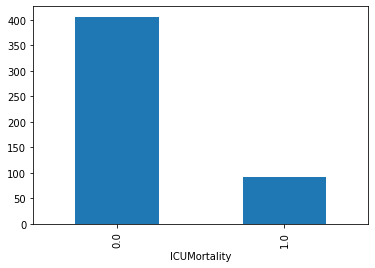

In [16]:
df = sepsis.groupby(['ICUMortality']).nunique().unstack()
df['h_num_hash'].plot(kind = 'bar')

In [17]:
dead = sepsis[sepsis['ICUMortality'] == 1]
# df = dead.groupby('ICUMortality').nunique()
# df

In [18]:
alive = sepsis[sepsis['ICUMortality'] == 0]
df = alive.groupby('ICUMortality').nunique()
df

,h_num_hash,Hourly_Counter,FiO2,PEEP,ProblemText,ProblemGroup,_merge,length of stay (hours),ArtBPM,PaO2-1,PaO2-2,LactateABG-1,LactateABG-2
ICUMortality,,,,,,,,,,,,,
0.0,406,1142,50,12,2,1,1,3,81,1059,368,138,65


                h_num_hash                          
Hourly_Counter  00ED7319-79A7-4E56-A921-25474DC11058    172
                00EFB901-6B59-479C-80DE-07DC6BB4A3FE     37
                00F1E480-63A6-4A48-A4E2-645251FEF8DC     42
                0153A96D-DFBB-4625-BF94-58B02092C006     18
                01CD939B-736A-479A-BFBE-3C95543061FA     17
                0274FD92-4FF4-4BF6-894C-B3E52AE05508      8
                0299E051-14DE-48B9-B579-831DC674106F     15
                02A0F8B6-8117-4F2C-ADFB-FBC365D34530    361
                035F86D2-0E95-461D-8579-1E926F563CD7     14
                03EF386E-8990-4395-AB4F-E5776F53CFF4     66
                049343AE-AD78-4B8C-A2F1-CB2BD4AF63F9     72
                04A8AC13-D429-442A-B352-3B23EB72D033    385
                04CD86E6-D3A3-43CF-92F2-50D78A4296AF    108
                051E8274-6576-4479-875B-CAA9A5C9E93F     17
                061337D3-FEF5-40B8-B4CC-D4B35B7EE7CF     18
                0630951A-ACE8-470F-ACB4-6E6B0EA

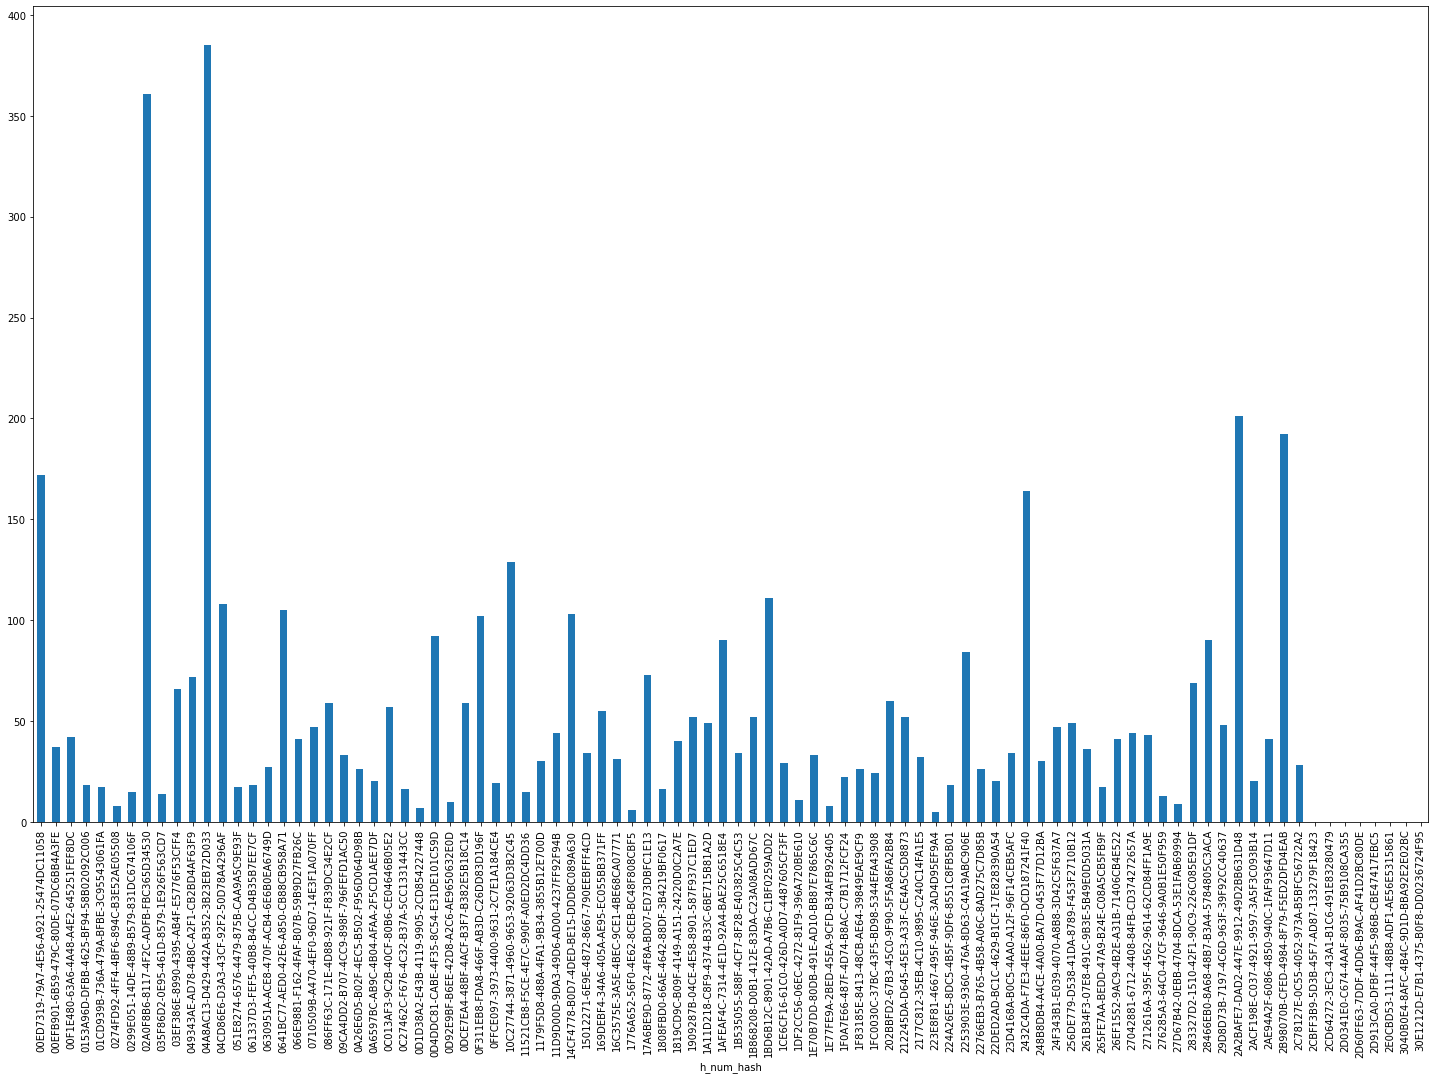

In [19]:
# how much time were the dead in the hospital
dn = dead.groupby('h_num_hash').nunique().unstack()
dn['Hourly_Counter'].plot(kind = 'bar', figsize =(25, 15))
dn.head(60)

                h_num_hash                          
Hourly_Counter  0001F70C-AA4C-46CC-8386-9A4D778B26BA     48
                002B9175-E697-4308-904F-243B4074C224     28
                002E7282-9C02-4D5C-8D3B-DDA2574ABCEF     16
                0030B684-28EE-4076-B8D1-B0CEDB9413F3      9
                004E2D79-7F96-431B-AA0E-3A6D5B90097D     31
                                                       ... 
                22F07C01-C72D-477F-963E-DA681D5874B8     38
                22FD3FE9-A605-447A-9632-30096EB7A764     55
                231CB8EA-FE9F-4A31-8D2C-87543AC086BB     25
                232E3387-4649-4A0F-9CC4-D01AB6822CFE     44
                2348D218-27EA-4C26-A04E-F28CF65A51B4    114
Length: 295, dtype: int64

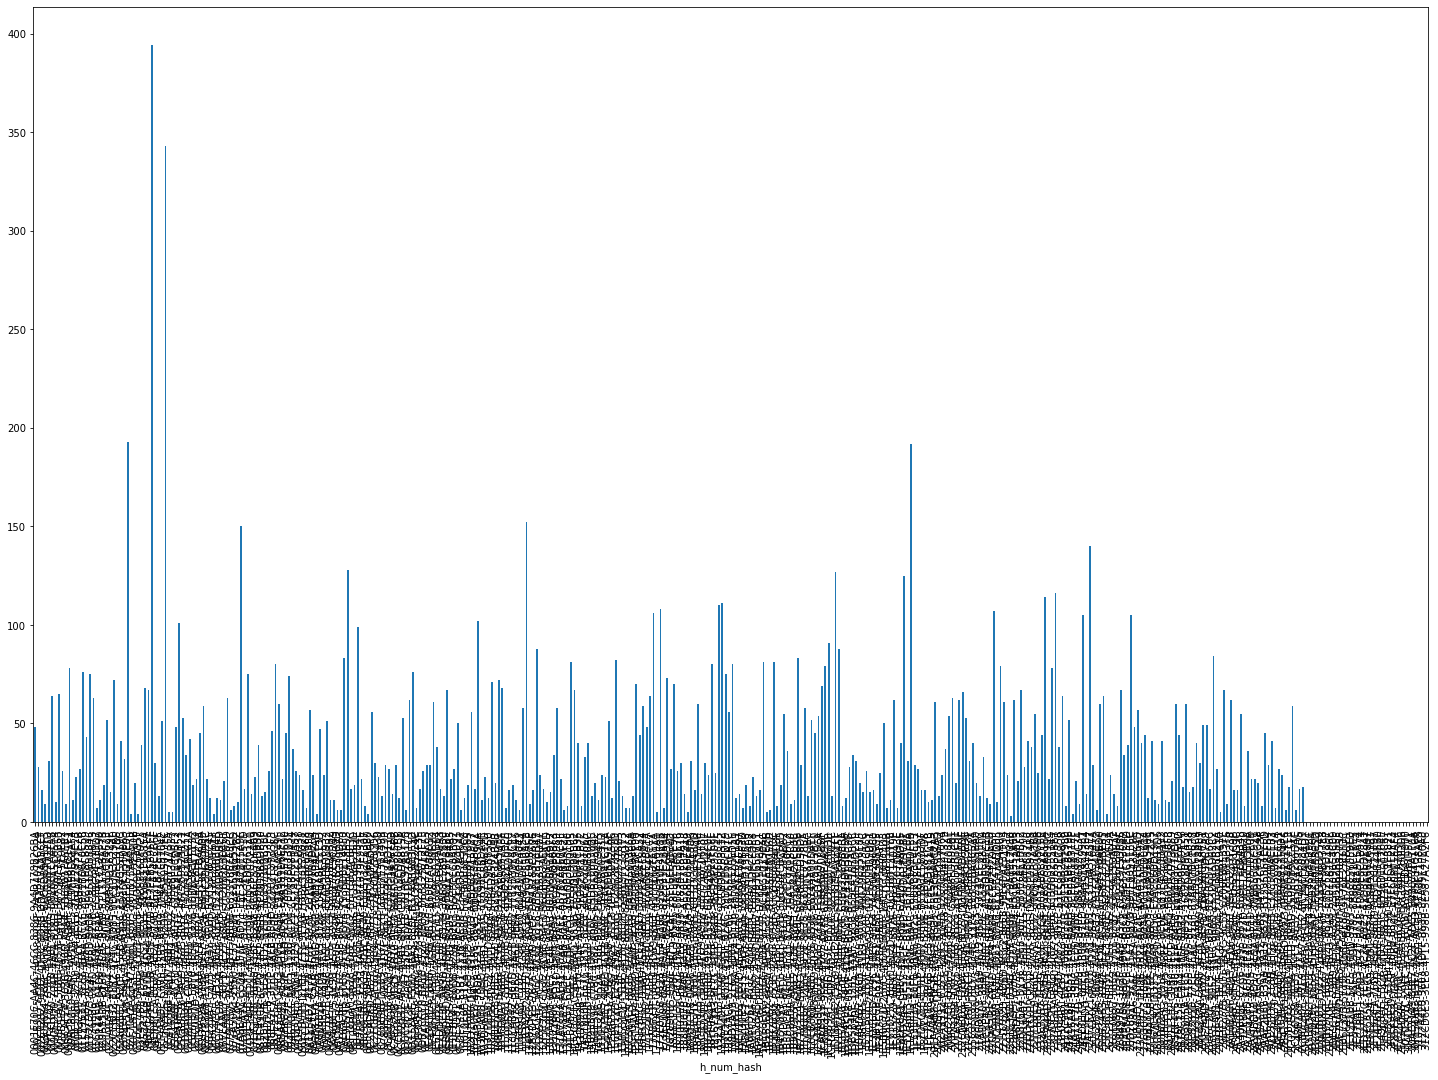

In [20]:
# how much time were the alive in the hospital
# as we can see if the patient pass the 100 hours
# his chances to survive are not good at all
# 12/92 dead and 10/406 alive
df = alive.groupby('h_num_hash').nunique().unstack()
df['Hourly_Counter'].plot(kind = 'bar', figsize =(25, 15))
df.head(295)


<AxesSubplot:xlabel='h_num_hash'>

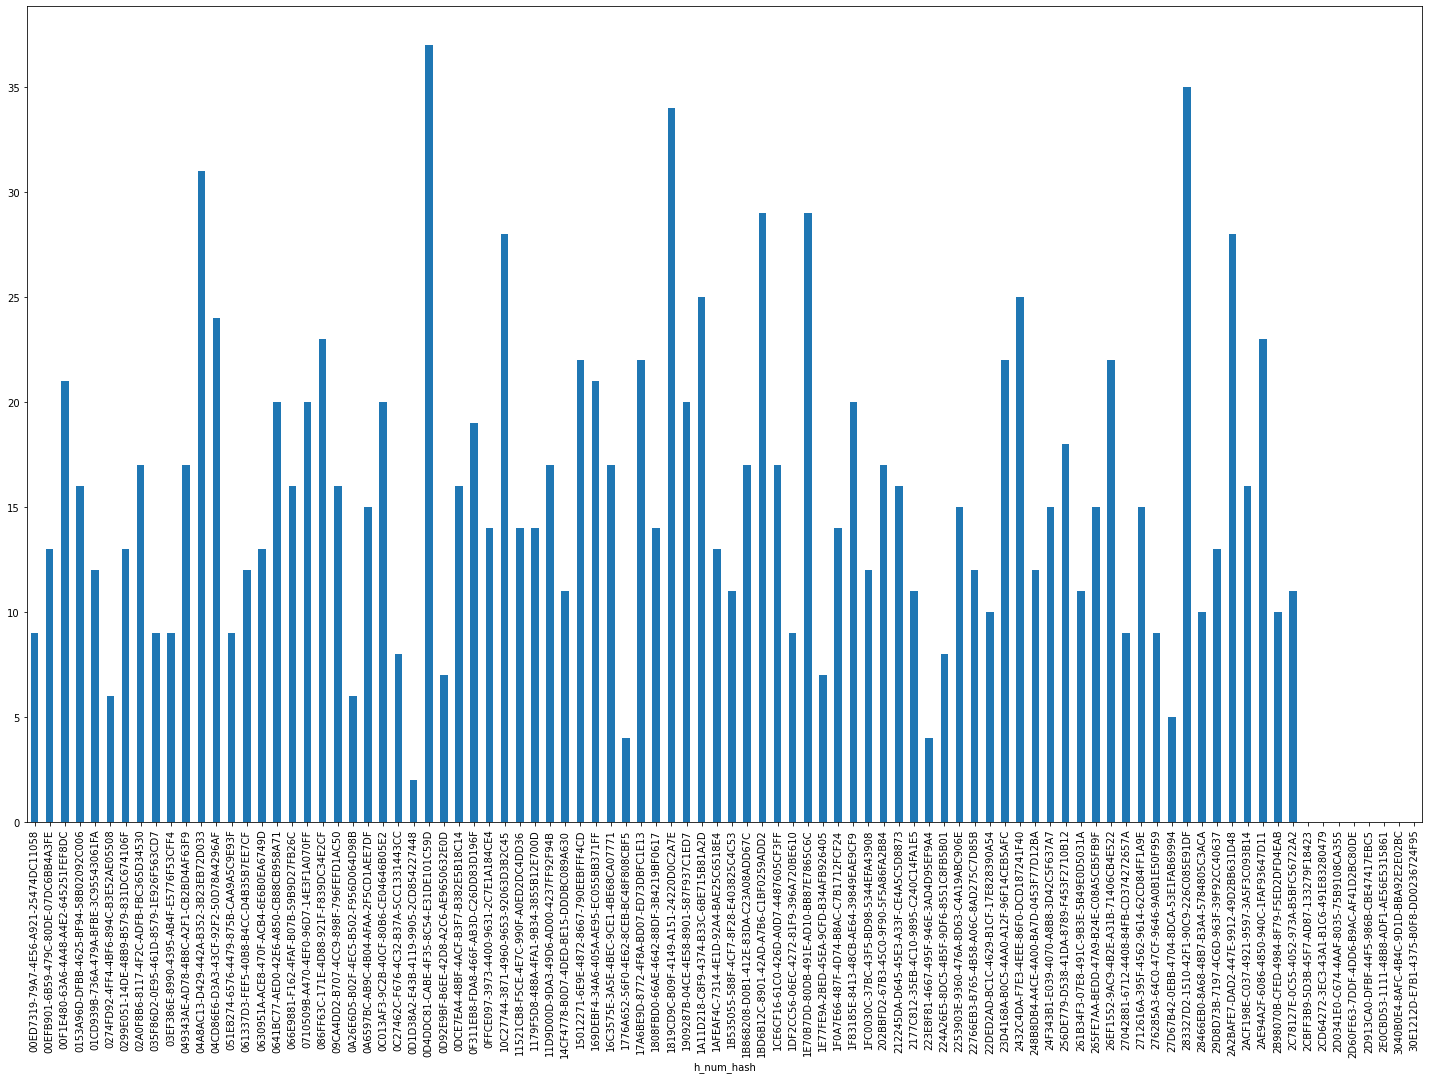

In [21]:
# mean of the lactate of the ptient
df = dead.groupby('h_num_hash').nunique()
df['LactateABG-1'].plot(kind = 'bar', figsize =(25, 15))
# dn = final_merge_df.groupby('h_num_hash')['LactateABG-1'].mean()
# print (dn)

<AxesSubplot:xlabel='h_num_hash'>

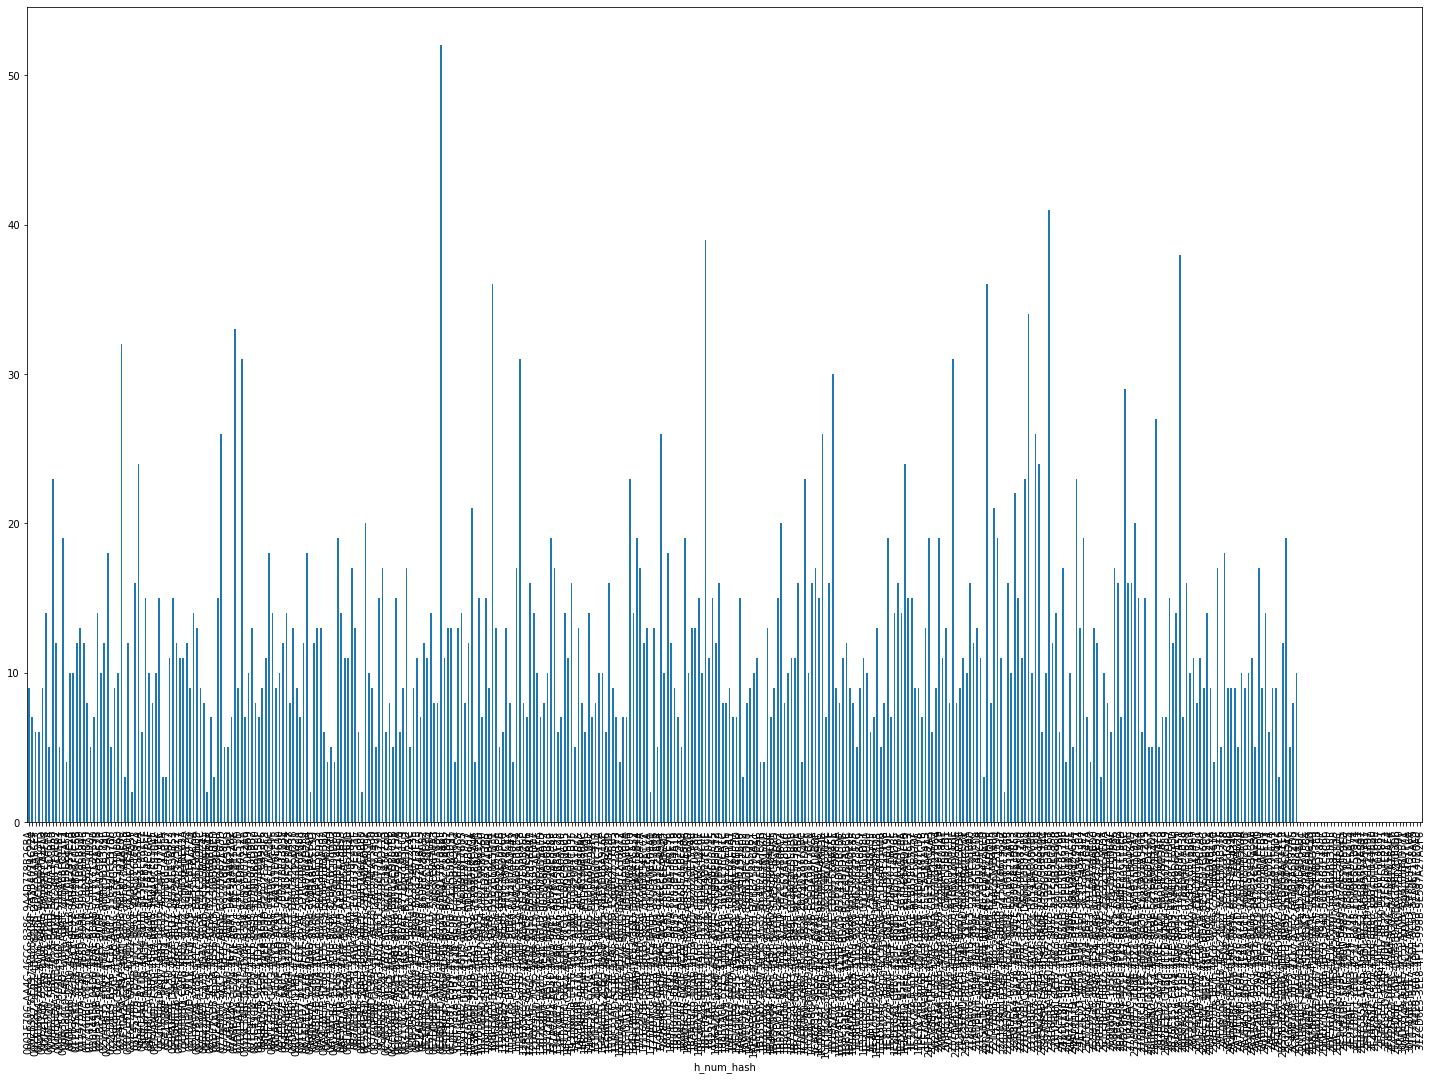

In [22]:
df = alive.groupby('h_num_hash').nunique()
df['LactateABG-1'].plot(kind = 'bar', figsize =(25, 15))

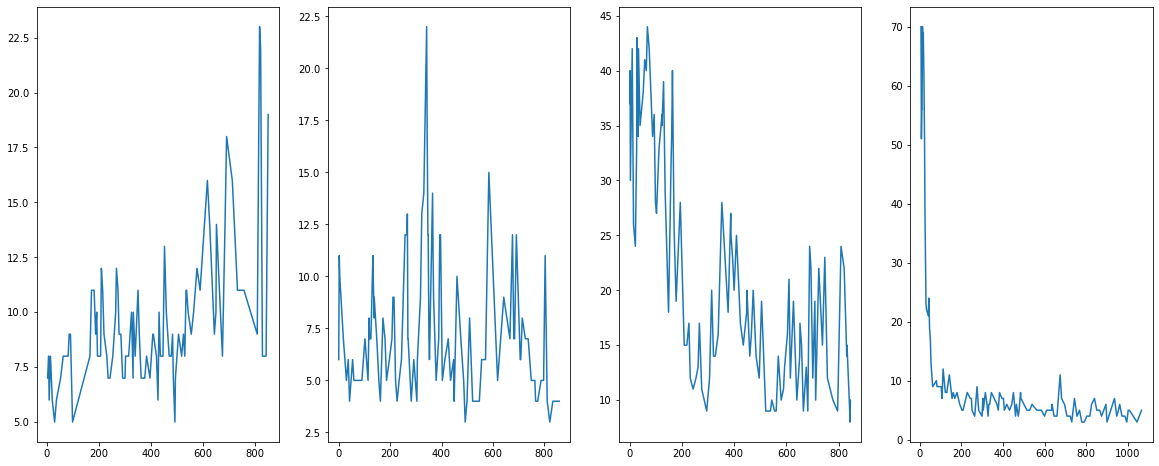

In [23]:
# alive, lactate
df = sepsis[sepsis['h_num_hash'] == '058ADFF8-D4C2-492F-9FD1-145AAE43AB53']
dn = sepsis[sepsis['h_num_hash'] == '1923FA63-1524-4315-8DE5-39F890666C45']
dk = sepsis[sepsis['h_num_hash'] == '220A51B6-6E4D-4AF4-AA84-F8CE4212DA59']
dl = sepsis[sepsis['h_num_hash'] == '2348D218-27EA-4C26-A04E-F28CF65A51B4']

df = df[df['LactateABG-1'].notna()]
dn = dn[dn['LactateABG-1'].notna()]
dk = dk[dk['LactateABG-1'].notna()]
dl = dl[dl['LactateABG-1'].notna()]

x1 = df['Hourly_Counter']
y1 = df['LactateABG-1']
x2 = dn['Hourly_Counter']
y2 = dn['LactateABG-1']
x3 = dk['Hourly_Counter']
y3 = dk['LactateABG-1']
x4 = dl['Hourly_Counter']
y4 = dl['LactateABG-1']

plt.figure(figsize = (20, 8))
plt.subplot(1, 4, 1)
plt.plot(x1, y1, label = "line 1")
plt.subplot(1, 4, 2)
plt.plot(x2, y2, label = "line 2")
plt.subplot(1, 4, 3)
plt.plot(x3, y3, label = "line 3")
plt.subplot(1, 4, 4)
plt.plot(x4, y4, label = "line 4")

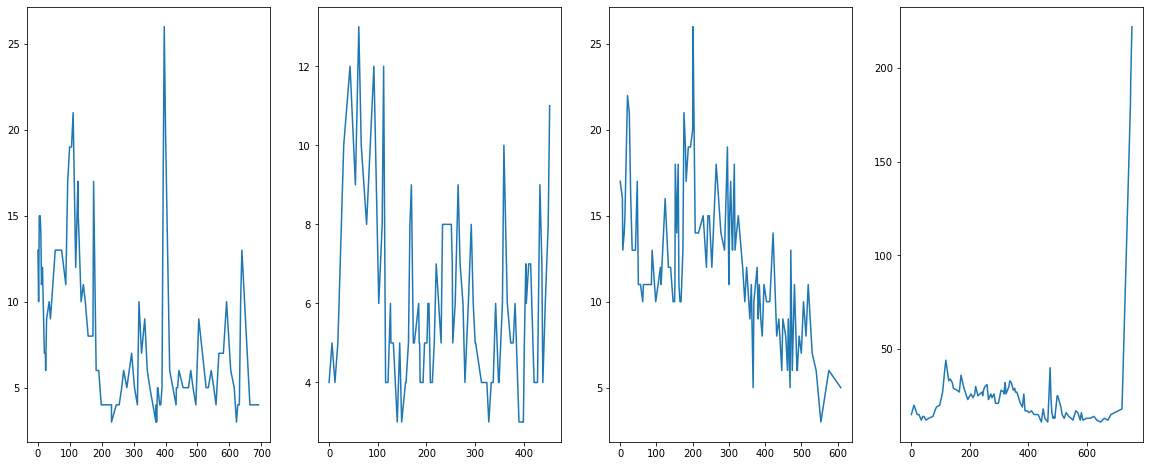

In [24]:
# dead, lactate
df = sepsis[sepsis['h_num_hash'] == '0F311EB8-FDA8-466F-AB3D-C26DD83D196F']
dn = sepsis[sepsis['h_num_hash'] == '14CF4778-B0D7-4DED-BE15-DDDBC089A630']
dk = sepsis[sepsis['h_num_hash'] == '0641BC77-AED0-42E6-A850-CB88CB958A71']
dl = sepsis[sepsis['h_num_hash'] == '1BD6B12C-8901-42AD-A7B6-C1BF0259ADD2']

df = df[df['LactateABG-1'].notna()]
dn = dn[dn['LactateABG-1'].notna()]
dk = dk[dk['LactateABG-1'].notna()]
dl = dl[dl['LactateABG-1'].notna()]

x1 = df['Hourly_Counter']
y1 = df['LactateABG-1']
x2 = dn['Hourly_Counter']
y2 = dn['LactateABG-1']
x3 = dk['Hourly_Counter']
y3 = dk['LactateABG-1']
x4 = dl['Hourly_Counter']
y4 = dl['LactateABG-1']

plt.figure(figsize = (20, 8))
plt.subplot(1, 4, 1)
plt.plot(x1, y1, label = "line 1")
plt.subplot(1, 4, 2)
plt.plot(x2, y2, label = "line 2")
plt.subplot(1, 4, 3)
plt.plot(x3, y3, label = "line 3")
plt.subplot(1, 4, 4)
plt.plot(x4, y4, label = "line 4")

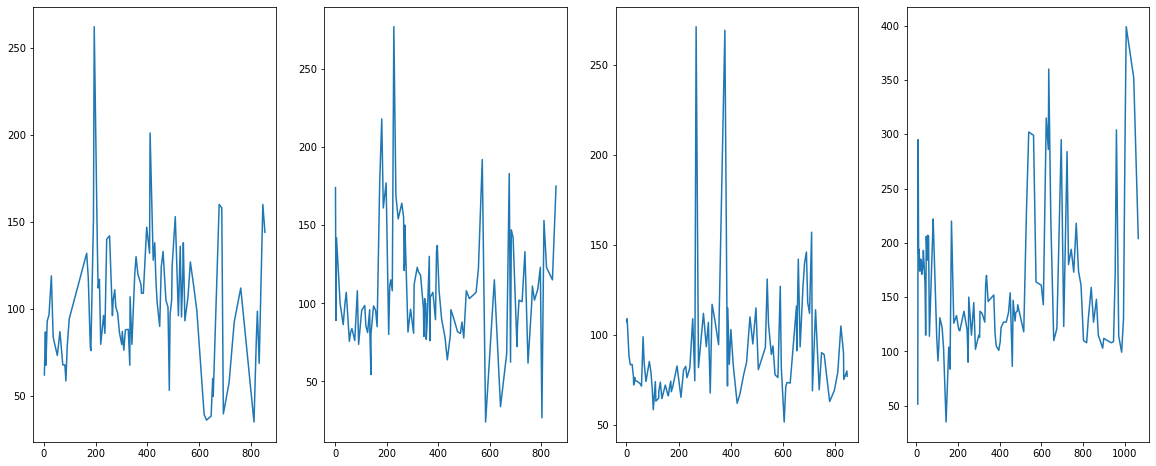

In [26]:
# alive, PaO2-1
df = sepsis[sepsis['h_num_hash'] == '058ADFF8-D4C2-492F-9FD1-145AAE43AB53']
dn = sepsis[sepsis['h_num_hash'] == '1923FA63-1524-4315-8DE5-39F890666C45']
dk = sepsis[sepsis['h_num_hash'] == '220A51B6-6E4D-4AF4-AA84-F8CE4212DA59']
dl = sepsis[sepsis['h_num_hash'] == '2348D218-27EA-4C26-A04E-F28CF65A51B4']

df = df[df['PaO2-1'].notna()]
dn = dn[dn['PaO2-1'].notna()]
dk = dk[dk['PaO2-1'].notna()]
dl = dl[dl['PaO2-1'].notna()]

x1 = df['Hourly_Counter']
y1 = df['PaO2-1']
x2 = dn['Hourly_Counter']
y2 = dn['PaO2-1']
x3 = dk['Hourly_Counter']
y3 = dk['PaO2-1']
x4 = dl['Hourly_Counter']
y4 = dl['PaO2-1']

plt.figure(figsize = (20, 8))
plt.subplot(1, 4, 1)
plt.plot(x1, y1, label = "line 1")
plt.subplot(1, 4, 2)
plt.plot(x2, y2, label = "line 2")
plt.subplot(1, 4, 3)
plt.plot(x3, y3, label = "line 3")
plt.subplot(1, 4, 4)
plt.plot(x4, y4, label = "line 4")

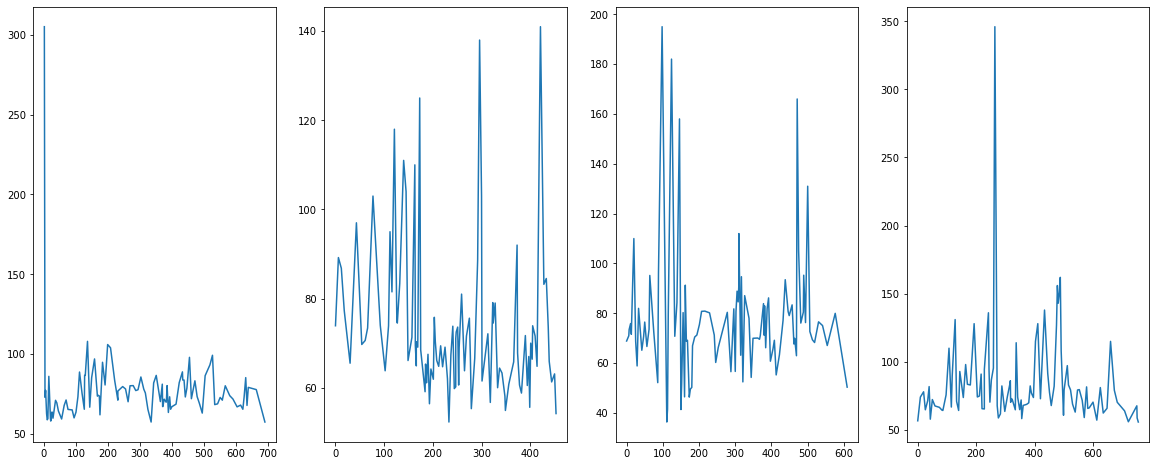

In [27]:
# dead, PaO2-1
df = sepsis[sepsis['h_num_hash'] == '0F311EB8-FDA8-466F-AB3D-C26DD83D196F']
dn = sepsis[sepsis['h_num_hash'] == '14CF4778-B0D7-4DED-BE15-DDDBC089A630']
dk = sepsis[sepsis['h_num_hash'] == '0641BC77-AED0-42E6-A850-CB88CB958A71']
dl = sepsis[sepsis['h_num_hash'] == '1BD6B12C-8901-42AD-A7B6-C1BF0259ADD2']

df = df[df['PaO2-1'].notna()]
dn = dn[dn['PaO2-1'].notna()]
dk = dk[dk['PaO2-1'].notna()]
dl = dl[dl['PaO2-1'].notna()]

x1 = df['Hourly_Counter']
y1 = df['PaO2-1']
x2 = dn['Hourly_Counter']
y2 = dn['PaO2-1']
x3 = dk['Hourly_Counter']
y3 = dk['PaO2-1']
x4 = dl['Hourly_Counter']
y4 = dl['PaO2-1']

plt.figure(figsize = (20, 8))
plt.subplot(1, 4, 1)
plt.plot(x1, y1, label = "line 1")
plt.subplot(1, 4, 2)
plt.plot(x2, y2, label = "line 2")
plt.subplot(1, 4, 3)
plt.plot(x3, y3, label = "line 3")
plt.subplot(1, 4, 4)
plt.plot(x4, y4, label = "line 4")